## **1. Overview of Previous Alogrithms**
---
### KNN
- Training data is the model
- Fitting is therefore fast
- Prediction can be slow are there can be lots of distacnes to measure
- Decision boundary is very flexible, as it depends on locations of points, not on a mathematical function

### Logistic regression
- Model is just described by the parameters, so low storage required (lightweight model)
- Fitting can be slow, must optimise to find the best parameters
- Prediction is fast, we just calculate the expected value using the parameters and the function
- Decision boundary is simple, and so less flexible, though we can use the kernel trick to get non-linear models

## 2. **Introduction to Decision Trees**
---
- Decision trees seek to segment data based on features to predict the result
- The points at which we segment our dataset based on conditions are called nodes, and the points where we are finally able to make a classification are called leaves
- This segmentation can also be used to perform regression (called regression trees):
    - We still "ask questions" to split our data into subsets, and we can use the average values of subsets to make our prediction
    - The possible outputs of a regression tree is defined by the number of splits that we have (would be a digtal-looking step function with step size 1/max_depth^n)

## **3. Building Decision Trees**
---
- Select a feature and split data into a binary tree (based on some condition)
- We then continue splitting with the avaiblable features to create further subsets of our data
- There are three main ways in which we can decide to stop branching:
    1. We keep splitting until leaf nodes are **pure** (ie. only one class remains), this strategy often overfits
    2. We could also enter a max depth, and stop or prune our tree at that max_depth - tries to reduce overfitting
    3. We could also keep splitting until a certain performance metric is reached (ie. accuracy) - also tries ot reduce overfitting

### Finding the Best Decision Tree
- We use greedy search, to find the best split at each step
- Here "best split" is defined by the split that maximises the information gained from the split

### Splitting based on Classification error:
- Classification error equation:
$$E(t) = 1 - \max_i \bigl[ p(i|t) \bigr] $$

### Entropy-based splitting
- Entropy equation:
$$H(t) = -\sum_{i=1}^n p(i|t)\log_2\bigl[p(i|t)\bigr]$$
- We then take the weighted average of the entropy of the child nodes, and compare it to the entropy of the parten node (ie. before the split)
- We are aiming for each split to reduce the entropy (reduce disorder/uncertainty)
- So when we are choosing which split is the "best split", we choose the split that reduces entropy by the largest amount

### Classification Error vs Entropy
- Classification error increases linearly from purity=0 until purity=0.5, where it then decreases linearly until purity=1 (ie. most error when 50/50 split)
    - With classification error, the function is flat, so the final average classification error can be identical to the parent (resulting in premature stopping)
- Entropy error has the same maximum as classification error, but it curves outside of the 50/50 split, and it is this curvature that allows splitting to keep occuring
    - With the entropy function, the function has a bulge, which allows average information of children to be less than that of the parent

### Gini index
- Function similar to entropy, but does not contain the logarithm, so it is far easier to compute
- Equation:
$$G(t) = 1 - \sum_{i=1}^n p(i|t)^2$$

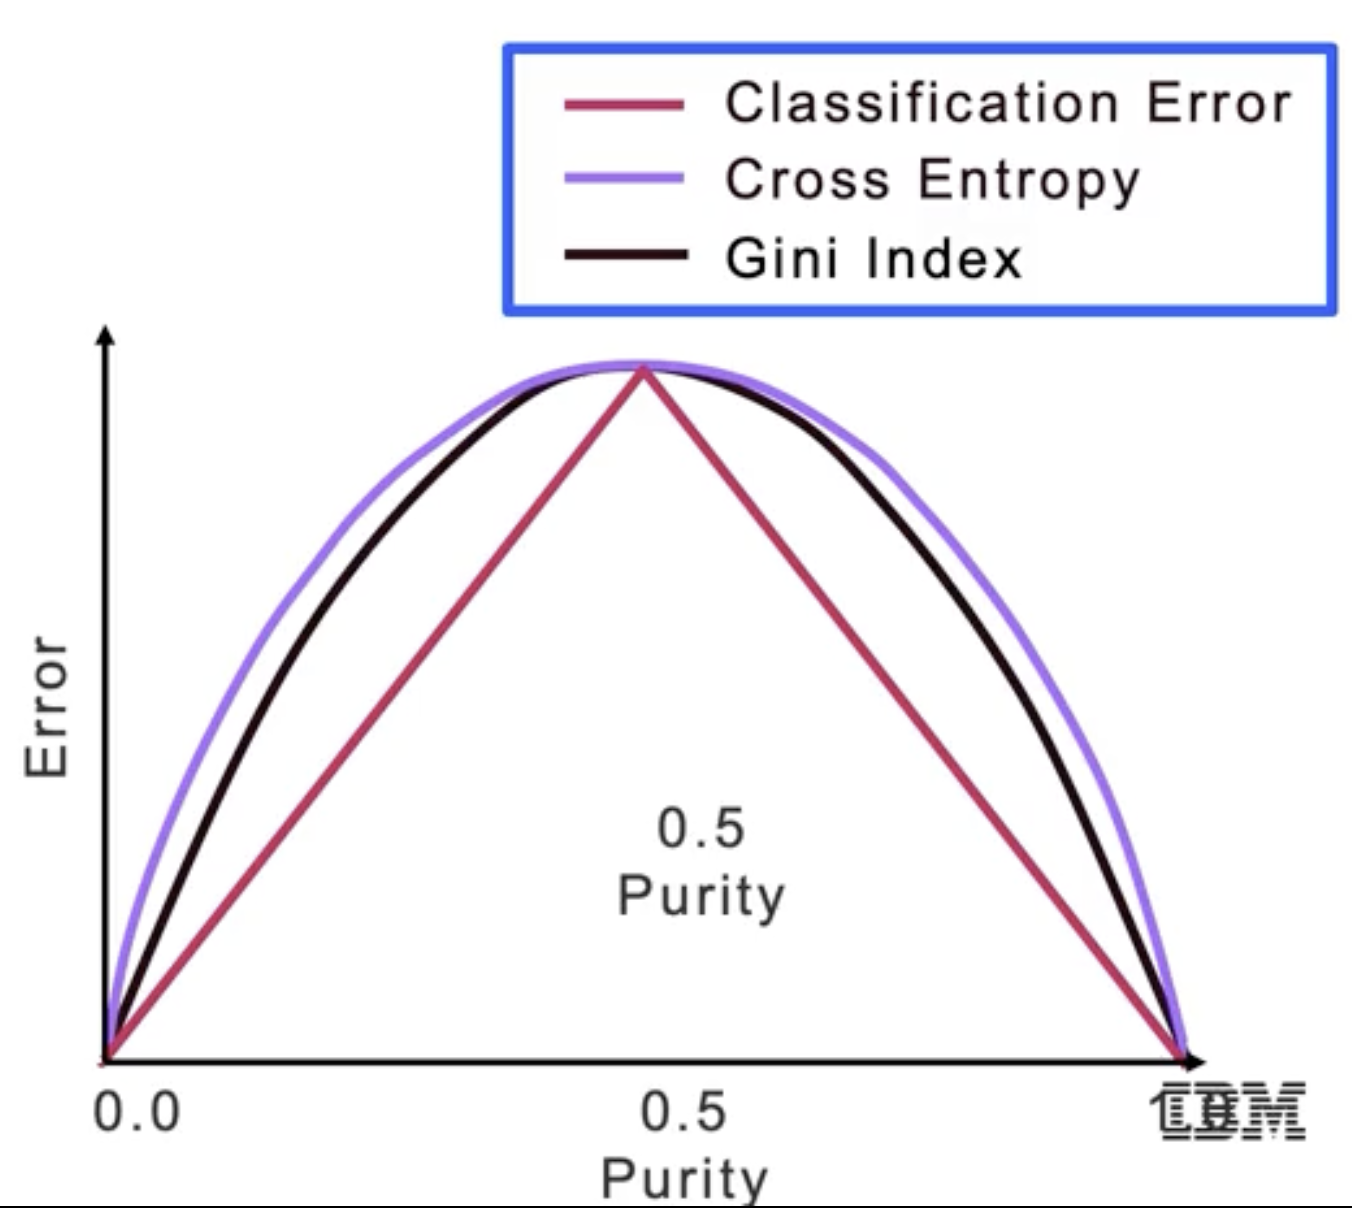

In [7]:
from IPython.display import Image, display

path = "/Users/alecmitchell-thomson/Desktop/Coding/ibm-ml-course/3-Supervised-Machine-Learning:Classification/decision_trees/Screenshot 2026-02-05 at 12.52.44.png"
# Specify the desired width (or height) in pixels
display(Image(filename=path, width=450))

## **4. Pruning Decision Trees**
---
- Decision trees are high variance, ie. they tend to overfit - so small changes in data end up greatly affecting the prediction

### Max Depth
### Classification error threshold
### Information gain threshold

## **5. Pros and Cons of Decision Trees**
---
### Pros
- Easy to interpret and implement, as it contains "if... then... else" logic
- Able to handle any data category, ie. binary, ordinal, continuous
- No preprocessing or scaling required (would just change the question asked at each node)

## **6. Syntax**
---

In [ ]:
# import the DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# create an instance of the DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion="Gini", max_depth=5, max_features=10)

# fit the model on the training data, and then predict the labels of the test data
dtc.fit(X_train, y_train)       # type: ignore
y_pred = dtc.predict(X_test)    # type: ignore

# if you want to do regression, you can use the DecisionTreeRegressor